In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

400
1


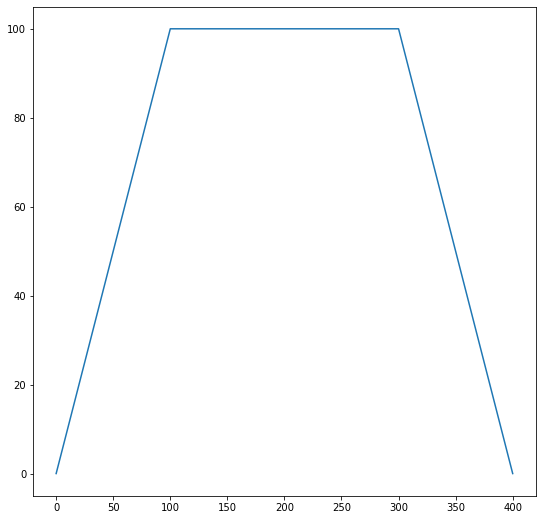

In [14]:
#  Y =[-10,-10,-10,-10,-10,10,10,10,10,10,-10,-10,-10,-10,-10,10,10,10,10,10,-10,-10,-10,-10,-10,10,10,10,10,10,-10,-10,-10,-10,-10,10,10,10,10,10,-10,-10,-10,-10,-10,10,10,10,10,10]
# # #Y =[-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,-10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,]
#  X = np.arange(0,len(Y))

Y=[]
# X = np.arange(0,201,1)
# for i in range(0,201):
#     if(X[i] <= 100):
#         Y.append(X[i])
#     elif(X[i] > 100):
#         Y.append(200-X[i])
        
        
X = np.arange(0,401,1)
for i in range(0,401):
    if(X[i] <= 100):
        Y.append(X[i])
    elif(X[i]<=300):
        Y.append(100)
    elif(X[i] > 300):
        Y.append(400-X[i])

dx = (X[1]-X[0])

L = X[len(X)-1]
print(L)
plt.plot(X,Y)
print(dx)

$a_o = \frac{2}{L} \int ^{L}_{0} f(x) $ <br> <br>


$a_n = \frac{2}{L} \int ^{L}_{0} f(x) cos \left( 2 n \pi \frac{x}{L} \right) dx$ <br><br>


$b_n = \frac{2}{L} \int ^{L}_{0} f(x) sin \left( 2 n \pi \frac{x}{L} \right) dx$ <br><br>



$f(x) = \frac{a_o}{2} + \sum_{0}^{n} a_n cos \left( 2 n \pi \frac{x}{L} \right) + b_n sin \left( 2 n \pi \frac{x}{L} \right)$

In [15]:
def a_o (y = Y):
    a = 0
    for i in range(0,len(y)):
        a += y[i] * dx
    return a/L

def a_n (y = Y, n=10):
    an = 0
    for i in range(0,len(y)):
        an += y[i] * np.cos(2*n*np.pi*(X[i]/L)) * dx
    return an/(L/2)

def b_n (y = Y, n=10):
    bn = 0
    for i in range(0,len(y)):
        bn += y[i] * np.sin(2*n*np.pi*(X[i]/L)) * dx
    return bn/(L/2)

In [30]:
n = 3

An = []
Bn = []
R = []

for i in range(0,n):
    An.append(a_n(Y,i))
    Bn.append(b_n(Y,i))
    R.append(np.sqrt(An[i]**2+Bn[i]**2))

An = np.array(An)
Bn = np.array(Bn)
R = np.array(R)

Ps = 1
time = np.arange(0,L*Ps)
w = 2 * np.pi/L

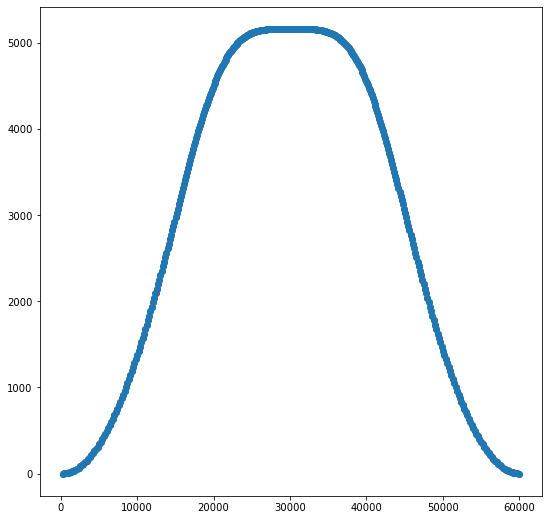

In [31]:

plt.rcParams["figure.figsize"] = (9,9)
figure, axes = plt.subplots(1)

u = np.zeros((len(time),n))
v = np.zeros((len(time),n))


xn = np.zeros_like(time)
yn = np.zeros_like(time)

x0 = 0.0
y0 = 0.0

for i in range(0,len(time)):
    for j in range(n):
        x0 += R[j] * np.cos(j*w*time[i])
        y0 += R[j] * np.sin(j*w*time[i])
        u[i][j] = x0
        v[i][j] = y0
    xn[i] = x0
    yn[i] = y0
    plt.scatter(x0, y0)

plt.scatter(xn,yn)

In [6]:
%time
# Function to return an animation, given a 2D array like u[i][j] that we have created.
# Notice how I have defined many default options that can be used to download the animation as a video
nn = np.arange(0,n)
def animate(arrayx, arrayy, save_animation=False, save_name='vdeo.mp4', save_dpi=300, save_fps=100):
    
    fig, ax = plt.subplots()                    # Define a figure and an axes. axes works just like plt, i.e. you can just do ax.plot, etc.
    
    graph, = ax.plot([], [], color='firebrick',lw=3) # Define an ``empty'' plot, we will be dynamically changing the data in this plot
    
    def init():                                                           # Initialise the whole plot
        ax.set_xlim(-10, 60000)                            # Setting the x and y limits of the plot
        ax.set_ylim(-10, 6000)
    
        ax.tick_params(top=False, bottom=False, left=False, right=False,  # Remove all axes (they're unnecessary here)
                       labelleft=False, labelbottom=False)
        return ax

    def animate(frame):                 # For frame number `frame',
        xdata = arrayx[frame]            # for every time-step, get the string's position data, and
        ydata = arrayy[frame]
        graph.set_data(xdata, ydata)        # plot the current position data against x (i.e., set the data for the graph object)
        return graph                    

    # Most important line, this is what actually handles the animation by calling the `animate' function with a frame number (integer)
    ani = FuncAnimation(fig, animate, init_func=init, blit=True, frames=1000, interval=20, repeat=True)   # Code to create animations
    
    if(save_animation):                                  # If you wish to save the animation, do so with the dpi and fps set here 
        ani.save(save_name, dpi=save_dpi, fps=save_fps)

    return ani                                           # When calling this FuncAnimation function from with a code, all the information that update the window 
                                                         # are attributes of the object ani. If you do not keep a reference to it around, then ani is garbage collected 
                                                         # all information about the graphs disappears when calling from within a function. You don't need this when you call 
                                                         # aren't calling the animation from within a function.

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.25 µs


<IPython.core.display.Javascript object>


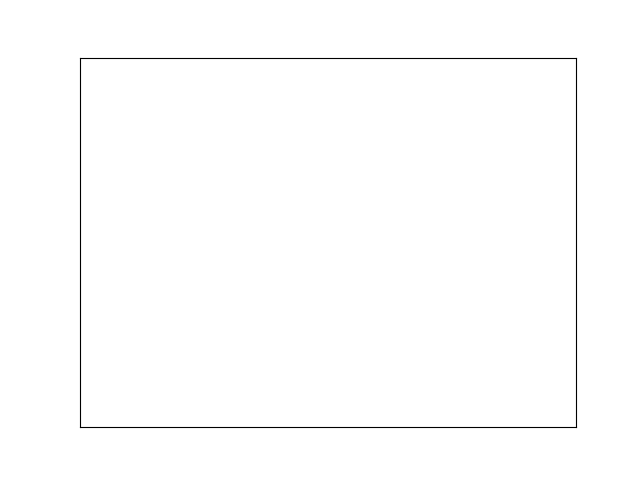

In [7]:
%matplotlib notebook
animate(u,v)